Jash Shah-60004180036
Deep Nanda-60004180019

We will now be analysing 2 Classification Algorithms to perform the Sentimental Analysis of Tweets from Twitter Dataset to (https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech).The dataset contains around 29k unique tweets.
The Classification algorithms under consideration are
1. Multinomial Naive Bayes Classifier
2. Logistic Regression Classifier
We will be using nltk module to preprocess the data by removing the stopwords of the English language and apply the cleaned data to the classification models and thereby compare the performance of the models under consideration .

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from google.colab import files
uploaded = files.upload()

Saving twitter_train.csv to twitter_train.csv


In [9]:
df=pd.read_csv("twitter_train.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [11]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [12]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [13]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

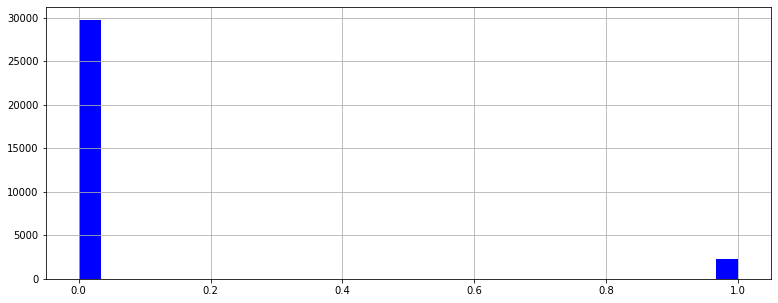

In [14]:
df['label'].hist(bins=30,figsize=(13,5),color='b')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


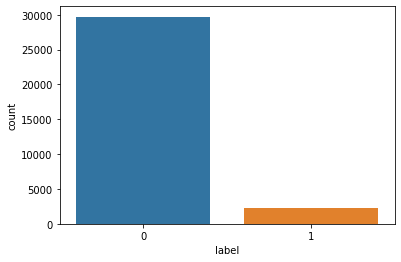

In [15]:
sns.countplot(df['label'])

In [16]:
df['length']=df['tweet'].apply(len)
df['length']

0        102
1        122
2         21
3         86
4         39
        ... 
31957     68
31958    131
31959     63
31960     67
31961     32
Name: length, Length: 31962, dtype: int64

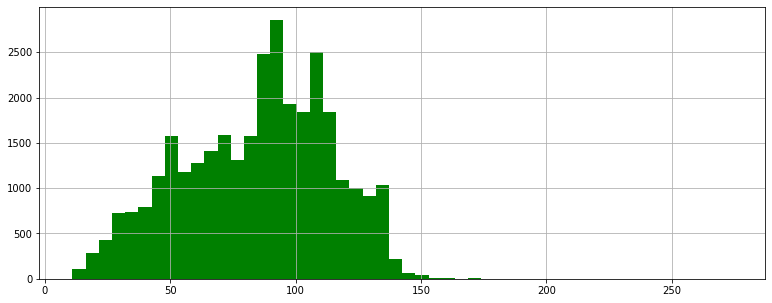

In [17]:
df['length'].hist(bins=50,figsize=(13,5),color='green')

In [18]:
positive=df[df['label']==0]
negative=df[df['label']==1]

In [19]:
positive

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
...,...,...,...,...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,61
31957,31958,0,ate @user isz that youuu?ðððððð...,68
31958,31959,0,to see nina turner on the airwaves trying to...,131
31959,31960,0,listening to sad songs on a monday morning otw...,63


In [20]:
negative

,id,label,tweet,length
13,14,1,@user #cnn calls #michigan middle school 'buil...,74
14,15,1,no comment! in #australia #opkillingbay #se...,101
17,18,1,retweet if you agree!,22
23,24,1,@user @user lumpy says i am a . prove it lumpy.,47
34,35,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,31948,1,@user @user you don't have the balls to hashta...,112
31948,31949,1,"makes you ask yourself, who am i? then am i a...",87


In [21]:
df.describe()

,id,label,length
count,31962.000000,31962.000000,31962.000000
mean,15981.500000,0.070146,84.739628
std,9226.778988,0.255397,29.455749
min,1.000000,0.000000,11.000000
25%,7991.250000,0.000000,63.000000
50%,15981.500000,0.000000,88.000000
75%,23971.750000,0.000000,108.000000
max,31962.000000,1.000000,274.000000


In [25]:
import string 
import nltk 
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
def text_cleaning(sentence):
    sentence_punc_removed=[letter for letter in sentence if letter not in string.punctuation]
    sentence_punc_removed=''.join(sentence_punc_removed)
    sentence_clean=[word for word in sentence_punc_removed.split() if word.lower() not in stopwords.words('english')]
    return sentence_clean

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
tweets_vectorizer=CountVectorizer(analyzer=text_cleaning,dtype='uint8').fit_transform(df['tweet'])

In [28]:
X=tweets_vectorizer.toarray()
y=df['label']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [30]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred=nb.predict(X_test)

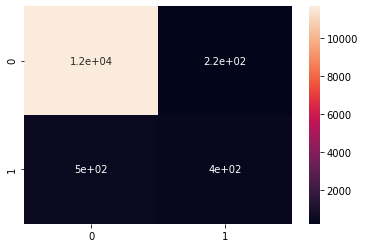

In [32]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [36]:
print(confusion_matrix(y_test,y_pred))

[[11659   220]
 [  504   402]]


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11879
           1       0.65      0.44      0.53       906

    accuracy                           0.94     12785
   macro avg       0.80      0.71      0.75     12785
weighted avg       0.94      0.94      0.94     12785



In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9433711380524051